# Observations and Inferences

1. There is a positive correlation between the mouses' weight and the tumor size so it is important to keep their weight down to the heathiest weight.
2. Capomulin seemed like an effective drug due to the tumor size decreasing over time based on the line graph for mouse b128.
3. The most effective drugs at reducing tumor size out of the 4 we analyzed were Capomulin and Ramicane.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../Resources/Mouse_metadata.csv"
study_results_path = "../Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
mouse_data_combined = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
# Display the data table for preview
mouse_data_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
 # Checking the number of mice.
mouse = mouse_data_combined.value_counts("Mouse ID")
number_mice = len(mouse)
number_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse = mouse_data_combined.loc[mouse_data_combined.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = pd.DataFrame(duplicate_mouse)
duplicate_mouse_df

,0
0,g989


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_data_combined[mouse_data_combined["Mouse ID"].isin(duplicate_mouse)==False]
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame
clean_mouse = clean_mouse_df.value_counts("Mouse ID")
clean_mouse_number = len(clean_mouse)
clean_mouse_number

248

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_drug_regimen = clean_mouse_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median_drug_regimen = clean_mouse_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance_drug_regimen = clean_mouse_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_drug_regimen = clean_mouse_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem_drug_regimen = clean_mouse_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

In [9]:
# Assemble the resulting series into a single summary dataframe.
regimen_stats_df = pd.DataFrame({"Mean": mean_drug_regimen, "Median": median_drug_regimen, "Variance": variance_drug_regimen, "Standard Deviation": std_drug_regimen, "SEM": sem_drug_regimen})
regimen_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Using the aggregation method, produce the same summary statistics in a single line
mouse_group = clean_mouse_df.groupby("Drug Regimen")
regimen_agg_df = mouse_group.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
regimen_agg_df

C:\Users\dillo\AppData\Local\Temp\ipykernel_20776\854805607.py:3: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  regimen_agg_df = mouse_group.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


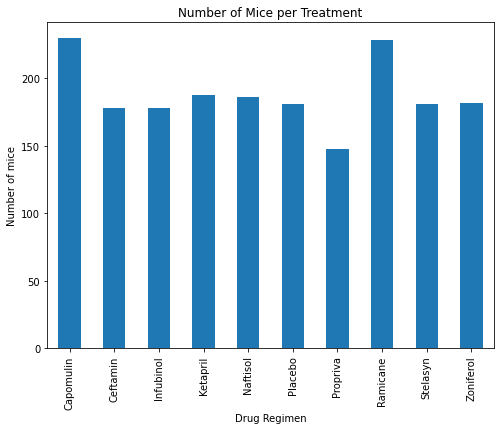

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_data = clean_mouse_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
bar1 = timepoint_data.plot(kind='bar', figsize=(8,6), title="Number of Mice per Treatment", xlabel="Drug Regimen", ylabel="Number of mice")

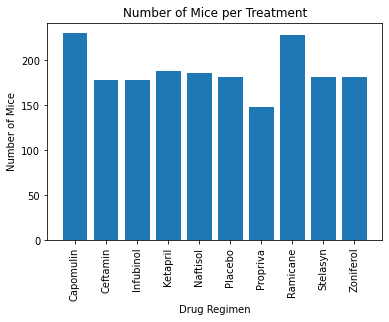

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(timepoint_data))
plt.bar(x_axis, timepoint_data,)
labels = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels, rotation='vertical')
plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

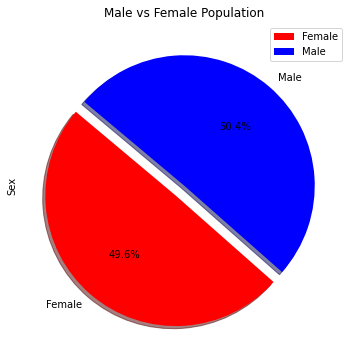

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
groupby_gender = clean_mouse_df.groupby(["Mouse ID","Sex"])
gender_df = pd.DataFrame(groupby_gender.size())
total_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
total_gender.columns = ["Total"]
total_gender["Percentage"] = ((total_gender["Total"]/total_gender["Total"].sum())*100)

colors = ["red", "blue"]
explode = (.1, 0)
total_gender.plot.pie(y="Total", figsize=(8,6), colors=colors, explode=explode, shadow=True, autopct="%1.1f%%", title="Male vs Female Population", startangle=140, ylabel="Sex")
plt.show()

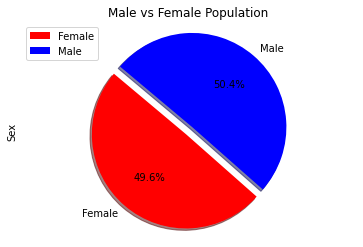

In [14]:
 # Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
colors = ["red", "blue"]
total = [49.596774, 50.403226]
explode = (0.1, 0)
plt.pie(total, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Male vs Female Population")
plt.ylabel("Sex")
plt.axis("equal")
plt.legend(loc="best")
plt.show()

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = mouse_data_combined.loc[mouse_data_combined["Drug Regimen"] == "Capomulin",:]
Ramicane_df = mouse_data_combined.loc[mouse_data_combined["Drug Regimen"] == "Ramicane", :]
Infubinol_df = mouse_data_combined.loc[mouse_data_combined["Drug Regimen"] == "Infubinol",:]
Ceftamin_df = mouse_data_combined.loc[mouse_data_combined["Drug Regimen"] == "Ceftamin",:]

In [16]:
# Start by getting the last (greatest) timepoint for each mouse
Capomulin_greatest = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]
Ramicane_greatest = Ramicane_df.groupby("Mouse ID").max()["Timepoint"]
Infubinol_greatest = Infubinol_df.groupby("Mouse ID").max()["Timepoint"]
Ceftamin_greatest = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]

In [17]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capo_greatest_df = pd.DataFrame(Capomulin_greatest)
Rami_greatest_df = pd.DataFrame(Ramicane_greatest)
Inf_greatest_df = pd.DataFrame(Infubinol_greatest)
Cef_greatest_df = pd.DataFrame(Ceftamin_greatest)
drug_greatest_df = pd.merge(pd.merge(pd.merge(Capo_greatest_df, Rami_greatest_df, on=("Mouse ID","Timepoint"), how="outer"), Inf_greatest_df, on=("Mouse ID","Timepoint"), how="outer"),Cef_greatest_df, on=("Mouse ID","Timepoint"), how="outer")
full_drug_merge = pd.merge(drug_greatest_df, mouse_data_combined, on=("Mouse ID", "Timepoint"), how="left")
full_drug_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,x226,0,Ceftamin,Male,23,28,45.000000,0
96,x581,45,Ceftamin,Female,19,28,64.634949,3
97,x822,45,Ceftamin,Male,3,29,61.386660,3
98,y769,45,Ceftamin,Female,6,27,68.594745,4


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capo_tumors = []
rami_tumors = []
inf_tumors = []
ceft_tumors = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for index, row in full_drug_merge.iterrows():
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    if row["Drug Regimen"] == "Capomulin":
        capo_tumors.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == treatments[1]:
        rami_tumors.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == treatments[2]:
        inf_tumors.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == treatments[3]:
        ceft_tumors.append(row["Tumor Volume (mm3)"])
    
    # add subset 
drug_tumor_df = pd.DataFrame({treatments[0]: capo_tumors,
                             treatments[1]: rami_tumors,
                             treatments[2]: inf_tumors,
                             treatments[3]: ceft_tumors})

In [19]:
# Determine outliers using upper and lower bounds for all 4 drugs
quart_capo = drug_tumor_df[treatments[0]].quantile([.25, .5, .75])
lower_capo = quart_capo[.25]
upper_capo = quart_capo[.75]
iqr_capo = upper_capo-lower_capo
lower_bound_capo = lower_capo - (1.5*iqr_capo)
upper_bound_capo = upper_capo + (1.5*iqr_capo)

quart_rami = drug_tumor_df[treatments[1]].quantile([.25, .5, .75])
lower_rami = quart_rami[.25]
upper_rami = quart_rami[.75]
iqr_rami = upper_rami - lower_rami
lower_bound_rami = lower_capo - (1.5*iqr_rami)
upper_bound_rami = upper_rami + (1.5*iqr_rami)

quart_inf = drug_tumor_df[treatments[2]].quantile([.25, .5, .75])
lower_inf = quart_inf[.25]
upper_inf = quart_inf[.75]
iqr_inf = upper_inf - lower_inf
lower_bound_inf = lower_inf - (1.5*iqr_inf)
upper_bound_inf = upper_inf + (1.5*iqr_inf)

quart_ceft = drug_tumor_df[treatments[3]].quantile([.25, .5, .75])
lower_ceft = quart_ceft[.25]
upper_ceft = quart_ceft[.75]
iqr_ceft = upper_ceft - lower_ceft
lower_bound_ceft = lower_ceft - (1.5*iqr_ceft)
upper_bound_ceft = upper_ceft + (1.5*iqr_ceft)

# Create a dataframe with the outlier data
outliers = pd.DataFrame({"Drug": treatments,
                        "Lower Quartile": [lower_capo, lower_rami, lower_inf, lower_ceft],
                        "Upper Quartile": [upper_capo, upper_rami, upper_inf, upper_ceft],
                        "IQR": [iqr_capo, iqr_rami, iqr_inf, iqr_ceft],
                        "Upper Bound": [upper_bound_capo, upper_bound_rami, upper_bound_inf, upper_bound_ceft],
                        "Lower Bound": [lower_bound_capo, lower_bound_rami, lower_bound_inf, lower_bound_ceft]})
outliers_groupby = outliers.groupby("Drug")
outliers_groupby.sum()

,Lower Quartile,Upper Quartile,IQR,Upper Bound,Lower Bound
Drug,,,,,
Capomulin,32.377357,40.159220,7.781863,51.832015,20.704562
Ceftamin,48.722078,64.299830,15.577752,87.666458,25.355450
Infubinol,54.048608,65.525743,11.477135,82.741446,36.832905
Ramicane,31.560470,40.659006,9.098537,54.306811,18.729552


In [20]:
# Detemine if any value is above or below the upper or lower bound for Capomulin
up_outliers_capo = drug_tumor_df["Capomulin"]> 51.832015
up_outliers_capo
lo_outliers_capo = drug_tumor_df["Capomulin"]< 20.704562
lo_outliers_capo
# There are no outliers for Capomulin

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
Name: Capomulin, dtype: bool

In [21]:
# Detemine if any value is above or below the upper or lower bound for Ceftamin
up_outliers_ceft = drug_tumor_df["Ceftamin"]> 87.666458
up_outliers_ceft
lo_outliers_ceft = drug_tumor_df["Ceftamin"]< 25.355450
lo_outliers_ceft
# There are no outliers for Ceftamin

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
Name: Ceftamin, dtype: bool

In [22]:
# Detemine if any value is above or below the upper or lower bound for Infubinol
up_outliers_inf = drug_tumor_df["Infubinol"]> 82.741446
up_outliers_inf
lo_outliers_inf = drug_tumor_df["Infubinol"]< 36.832905
lo_outliers_inf
drug_tumor_df["Infubinol"]
# There is an outlier of 36.321346 for Infubinol

0     67.973419
1     65.525743
2     57.031862
3     66.083066
4     72.226731
5     36.321346
6     60.969711
7     62.435404
8     60.918767
9     67.289621
10    66.196912
11    62.117279
12    47.010364
13    60.165180
14    55.629428
15    45.699331
16    54.656549
17    55.650681
18    46.250112
19    54.048608
20    51.542431
21    50.005138
22    58.268442
23    67.685569
24    62.754451
Name: Infubinol, dtype: float64

In [23]:
# Detemine if any value is above or below the upper or lower bound for Ramicane
up_outliers_rami = drug_tumor_df["Ramicane"]> 54.306811
up_outliers_rami
lo_outliers_rami = drug_tumor_df["Ramicane"]< 18.729552
lo_outliers_rami
# There are no outlier for Ramicane

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
Name: Ramicane, dtype: bool

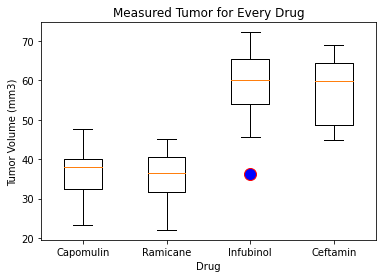

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker="o", markerfacecolor="blue", markeredgecolor="red", markersize=12)
plt.boxplot(drug_tumor_df, flierprops=flierprops)
plt.title("Measured Tumor for Every Drug")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug")
plt.xticks([1,2,3,4], treatments)
plt.show()

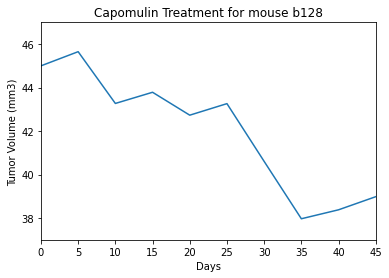

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_line_df = clean_mouse_df.loc[clean_mouse_df["Mouse ID"] == "b128",:]
capo_line_df

# Define x-axis
x_axis = capo_line_df["Timepoint"]

#Define y-axis
y_axis = capo_line_df["Tumor Volume (mm3)"]

# Plot all of the data on a line graph
plt.plot(x_axis, y_axis)
plt.title("Capomulin Treatment for mouse b128")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0, x_axis.max())
plt.ylim(37, 47)
plt.show()

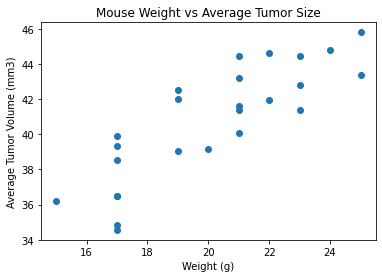

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_scatter_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin",:]
capo_average = capo_scatter_df.groupby(["Mouse ID"]).mean()

# Plot information on a scatterplot
plt.scatter(capo_average["Weight (g)"], capo_average["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Size")
plt.show()

In [27]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(capo_average["Weight (g)"], capo_average["Tumor Volume (mm3)"])[0], 2)
correlation

0.84

In [28]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
lin_regress = st.linregress(capo_average["Weight (g)"], capo_average["Tumor Volume (mm3)"])
lin_regress

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [29]:
# Set slope and intercept
slope = 0.9544396890241049
intercept = 21.552160532685008

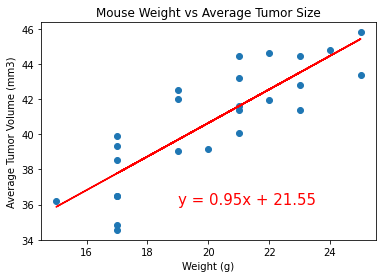

In [30]:
# Plotting the regression line on the scatterplot
regress_line = slope * (capo_average["Weight (g)"]) + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(capo_average["Weight (g)"], capo_average["Tumor Volume (mm3)"])
plt.plot(capo_average["Weight (g)"], regress_line, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Size")
plt.annotate(line_equation,(19,36), color="red", fontsize=15)
plt.show()